<a href="https://colab.research.google.com/github/lamiaakhairyibrahim/ITI_training/blob/main/knn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

# 1.load dataset

In [2]:
iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target


df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 2. Data preprocessing

# 3.Data Exploration & Visualization

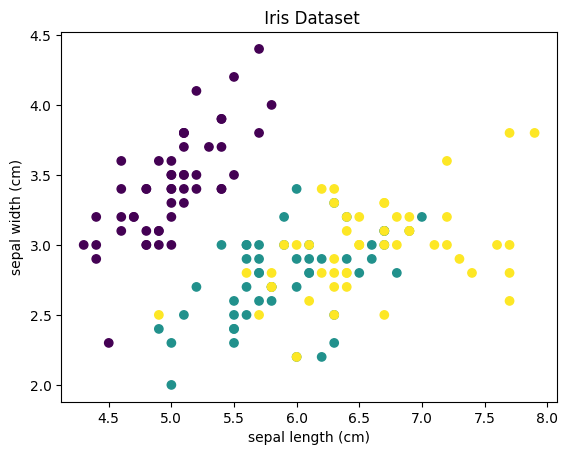

In [3]:

plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'],c=df['target'] , marker='o')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title(" Iris Dataset")
plt.show()

# 4. select model

In [5]:
from sklearn.model_selection import train_test_split

In [21]:
X = df[iris.feature_names]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. model train

In [22]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


# 6.evaluation

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred)*100, "%")
print('-'*50)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print('-'*50)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print('-'*50)

Accuracy: 100.0 %
--------------------------------------------------

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

--------------------------------------------------

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
--------------------------------------------------


# 7.model optimization
## K (Hyperparameter Tuning)

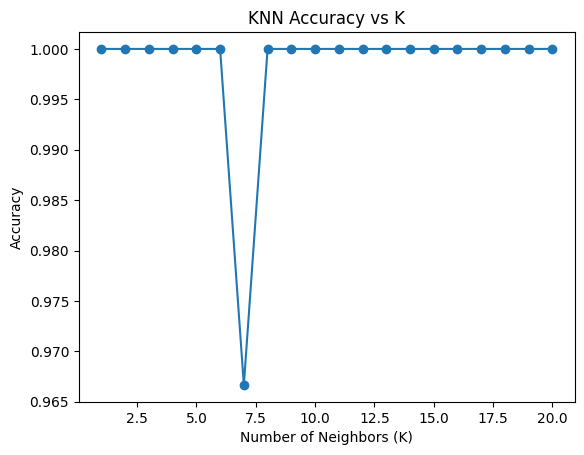

In [24]:


accuracies = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(range(1, 21), accuracies, marker='o')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K")
plt.show()